# Decision Tree for Regression

In this notebook we study the Decision Tree algorithm for regression problems. As in the other notebook, we will introduce the model from a theoretical point of view and then we apply it to a concrete example in a mini-challenge. The notebook is structured as followed:

- [Theoretical Analysis:](#s1)
    - [Algorithm](#s1.1)
    - [Advantages and Limitations](#s1.2)
    
- [Implementation in `sklearn`](#s2)
- [Mini-challenge](#s3)

<a id='s1'></a>
## Theoretical Analysis

Decision Tree learning is one of the predictive modeling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item to conclusions about the item's target value. Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values are called regression trees. 

Tree-based methods partition the feature space into a set of rectangles, and then fit a simple model in each one. They are conceptually simple yet powerful. 

Let’s consider a regression problem with continuous response $Y$ and inputs $X_1$ and $X_2$. To simplify matters, we restrict attention to recursive binary partitions like the one in the picture below


<div>
<img width=300 src='images/tree3.png' /> 
</div>



We first split the space into two regions, and model the response by the mean of $Y$ in each region. We choose the variable and split-point to achieve the best fit. Then one or both of these regions are split into two more regions, and this process is continued, until some stopping rule is applied. For example, in the picture, we first split at $X_1=t_1$. Then the region $X_1\le t_1$ is split at $X_2=t_2$ and the region $X_1>t_1$ is split at $X_1=t_3$. Finally, the region $X_1>t_3$ is split at $X_2=t_4$. The result of this process is a partition into five regions $R_1, \cdots, R_5$. The corresponding regression model predicts $Y$ with a constant $c_m$ in the region $R_m$, that is, 

$\quad$

\begin{align}
\hat{f}(X)=\sum_{m=1}^5c_mI\left\{\left(X_1,X_2\right)\in R_m\right\}
\end{align}

where $I(x)$ is the index function that takes values 0 or 1 depending if the condition in the argumenti is satisfied or not. This same model can be represented by the binary tree or by the 3d function in the picture below


<div>
<img width=500 src='images/tree4.png' /> 
</div>

The full dataset sits at the top of the tree in what we call __root node__. Observations satisfying the condition at each __decision node__ are assigned to the left __branch__ (or subtree), and the others to the right one. The __terminal nodes__ or __leaves__ of the tree correspond to the regions $R_1, \cdots, R_5$. The main parts of a decision tree can be summarized in the following picture 



<div>
<img width=500 src='images/tree2.png' /> 
</div>


So far we discussed the general setup of the decision and the next step will be to analyze first of all is the tree is for regression or classification purpose and then to focus on the algorithm that the tree uses. There are many specific decision-tree algorithms. Notable ones include:

- ID3 (Iterative Dichotomiser 3)
- C4.5 (successor of ID3)
- CART (Classification And Regression Tree)
- Chi-square automatic interaction detection (CHAID)
- MARS: extends decision trees to handle numerical data better.
- Conditional Inference Trees. Statistics-based approach that uses non-parametric tests as splitting criteria, corrected for multiple testing to avoid overfitting. 

In this work we focus on decision tree for regression and in particular on the algorithm CART

<a id='s1.1'></a>
### Algorithm

Classification and regression trees (CART) are a non-parametric decision tree learning technique that produces either classification or regression trees, depending on whether the dependent variable is categorical or numeric, respectively. Algorithms for constructing decision trees usually work top-down, by choosing a variable at each step that best splits the set of items. Different algorithms use different metrics for measuring "best". These generally define a __criterion__.
We are going to describe the CART algorithm for regression using the squared error as metric. 

Our dataset consist of $p$ inputs and a reponse, for each of $N$ observations: that is, $(x_i,y_i)$ for $i=1,\cdots, N$, with $x_i=\left(x_{i1},\cdots x_{ip}\right)$. The algorithm needs to automatically decide on the splitting variable and split points, and also what shape the tree should have. Suppose first that we have a partition into $M$ regions $R_1,\cdots R_M$, and we model the reponse as a constant $c_m$ in ech region:

$\quad$

\begin{align}
f(x)=\sum_{m=1}^Mc_mI(x\in R_m)
\end{align}

If we adopt as our __criterion__ minimization of the sum of squares $\sum(y_i-f(x_i))^2$, it is easy to see that the best $\hat{c}_m$ is just the estimator of expected value (the average) of $y_i$ in the region $R_m$:

$\quad$

\begin{align}
\hat{c}_m=\text{ave}(y_i|x_i\in R_m)
\end{align}


Now finding the best binary partition in terms of minimum sum of squares is generally infeasible. Hence we proceed with a __greedy algorithm__. Starting with all of the data, consider a splitting variable $j$ and split point $s$, and define the pair of half-planes


$\quad$

\begin{align}
R_1(j,s))\{X|X_j\le s\}\quad \text{and}\quad R_2(j,s))\{X|X_j> s\}
\end{align}

Then we seek the splitting variable $j$ and split point $s$ that solve


$\quad$

\begin{align}
\min_{j,s}\left[\min_{c_1}\sum_{x_i\in R_1(j,s)}(y_i-c_1)^2+\min_{c_2}\sum_{x_i\in R_2(j,s)}(y_i-c_2)^2\right]
\end{align}


For any choice $j$ and $s$, the inner minimization is solved by


$\quad$

\begin{align}
\hat{c}_1=\text{ave}(y_i|x_i\in R_1(j,s))\quad \text{and}\quad \hat{c}_2=\text{ave}(y_i|x_i\in R_2(j,s))
\end{align}

For each splitting variable, the determination of split point $s$ can be done very quickly and hence by scanning through all of the inputs, determination of the best pair $(j,s)$ is feasible. Having found the best split, we partition the data into the two resulting regions and repeat the splitting process on each of the two regions. Then this process is repeated on all of the resulting regions. 


One of the questions that arises in a decision tree algorithm is the optimal size of the final tree. A tree that is too large risks overfitting the training data and poorly generalizing to new samples. A small tree might not capture important structural information about the sample space. However, it is hard to tell when a tree algorithm should stop because it is impossible to tell if the addition of a single extra node will dramatically decrease error. This problem is known as the __horizon effect__.

There is in general two ways to set constraints on tree size: __Setting Constraints on Tree Size__  and __Pruning__.

1. __Setting Constraints on Tree Size__: 

    This can be done by using various parameters which are used to define a tree. The parameters used for defining a tree are: 
    
 - Minimum samples for a node split (it should be tuned using CV)
 - Minimum samples for a terminal node
 - Maximum depth of tree (it should be tuned using CV)
 - Maximum number of terminal nodes
 - Maximum features to consider for split



2. __Tree Pruning__: 

    This strategy is to grow the tree until each node contains a small number of instances then use pruning to remove nodes that do not provide additional information. We are going to show the pruning in details. Pruning should reduce the size of a learning tree without reducing predictive accuracy as measured by a cross-validation set. There are many techniques for tree pruning that differ in the measurement that is used to optimize performance:
    

- __Reduced error pruning__: 
   
     One of the simplest forms of pruning is reduced error pruning. Starting at the leaves, each node is replaced with its most popular class. If the prediction accuracy is not affected then the change is kept. While somewhat naive, reduced error pruning has the advantage of simplicity and speed.
    

- __Cost complexity pruning__: 

     We grow a large tree $T_0$ stopping the splitting process nly when some minimum node size (say 5) is reached. Then this tree is pruned as follows. We define a subtree $T\subset T_0$ to be any tree that can be obtained by pruning $T_0$, that is, collapsing any number of its internal nodes. We index terminal nodes by $m$ representing region $R_m$. Let $|T|$ denote the number of terminal nodes in $T$. Letting
     

  \begin{align}
   N_m&=\#\{x_\in R_m\}\\
  \hat{c}_m&=\frac{1}{N_m}\sum_{x_i\in R_m}y_i\\
  Q_m(T)&=\frac{1}{N_m}\sum_{x_i\in R_m}(y_i-\hat{c}_m)^2
  \end{align}
  
  we define the cost complexity criterion


  \begin{align}
  C_{\alpha}(T)= \sum_{m=1}^{|T|}N_mQ_m(T) +\alpha|T|
   \end{align}

  The idea is to find, for each $\alpha$, the subtree $T_{\alpha}\subset T_0$ to minimize $C_{\alpha}(T)$. The tuning   parameter $\alpha\ge 0$ governs the tradeoff between tree size and its goodness of fit to the data. Large values of  $\alpha$ result in smaller trees $T_{\alpha}$, and conversely for smaller values of $\alpha$. As the notation suggests, with $\alpha=0$ the solution is the full tree $T_0$. We discuss how to adaptively choose $\alpha$ below.
   For each α one can show that there is a unique smallest subtree $T_{\alpha}$ that minimizes $C_{\alpha}(T)$. To find $T_{\alpha}$ we use weakest link pruning: we successively collapse the internal node that produces the smallest per-node increase in $\sum_mN_mQ_m(T)$, and continue until we produce the single-node (root) tree. This gives a (finite) sequence of subtrees, and one can show this sequence must contain $T_{\alpha}$. Estimation of $\alpha$ is achieved by five or ten fold cross-validation: we choose the value $\hat{\alpha}$ to minimize the cross-validated sum of squares. Our final tree is $T_{\alpha}$.






<a id='s1.2'></a>
### Advantages and Limitations

Amongst other data mining methods, decision trees have various advantages:

- It can be used for both Classification and Regression problems: People are able to understand decision tree models after a brief explanation. Trees can also be displayed graphically in a way that is easy for non-experts to interpret.


- Easy to Understand, Interpret, Visualise


- Useful in Data exploration: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables.


- Less data preparation required: It is not influenced by outliers and missing values to a fair degree.


- Data type is not a constraint: It can handle both numerical and categorical variables


- Can capture Nonlinear relationships

Amongst the limitation we have

- Over fitting: Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.


- Not fit for continuous variables: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.


- Cannot extrapolate


- Decision trees can be unstable: Small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.


- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristics such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. To reduce the greedy effect of local optimality, some methods such as the dual information distance (DID) tree were proposed.


<a id='s2'></a>
## Implementation in `sklearn`

The class `DecisionTreeRegressor` of the module `sklearn.tree` is:

`sklearn.tree.DecisionTreeRegressor`

Since it's a class is composed by __parameters__, __attributes__ and __method__. We list here them with a biref explanation

### Parameters

- `criterion`: {“mse”, “friedman_mse”, “mae”}, default=”mse”

    The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, and “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node.

- `splitter`: {“best”, “random”}, default=”best”

    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- `max_depth`: int, default=None

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Used to control over-fitting as higher depth will allow the model to learn relations very specific to a particular sample. Too high values can lead to over-fitting hence, it should be fine-tuned with care.

- `min_samples_split`: int or float, default=2

    The minimum number of samples required to split an internal node. Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting hence, it should be fine-tuned with care.

- `min_samples_leaf`: int or float, default=1

    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. Used to control over-fitting similar to Minimum samples for a node split. Too high values can lead to under-fitting hence, it should be fine tuned with care.

- `min_weight_fraction_leaf`: float, default=0.0

    The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

- `max_features`: int, float or {“auto”, “sqrt”, “log2”}, default=None

    The number of features to consider when looking for the best split. Higher values can lead to over-fitting but depend on case to case.


    
    - If int, then consider max_features features at each split.
    - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=n_features.
    - If “sqrt”, then max_features=sqrt(n_features).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.

- `random_state`: int or RandomState, default=None

    If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

- `max_leaf_nodes`: int, default=None

    Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

- `min_impurity_decrease`: float, default=0.0

    A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

- `ccp_alpha`: non-negative float, default=0.0

    Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

### Attributes

- `feature_importances_`: ndarray of shape (n_features,)

    Return the feature importances.

- `max_features_`: int

    The inferred value of max_features.

- `n_features_`: int

    The number of features when fit is performed.

- `n_outputs_`: int

    The number of outputs when fit is performed.

- `tree_`: Tree

    The underlying Tree object.

### Methods

- `apply(self, X[, check_input])`: Return the index of the leaf that each sample is predicted as.

- `cost_complexity_pruning_path(self, X, y[, …])`: Compute the pruning path during Minimal Cost-Complexity Pruning.

- `decision_path(self, X[, check_input])`: Return the decision path in the tree.

- `fit(self, X, y[, sample_weight, …])`: Build a decision tree regressor from the training set (X, y).

- `get_depth(self)`: Return the depth of the decision tree.

- `get_n_leaves(self)`: Return the number of leaves of the decision tree.

- `get_params(self[, deep])`: Get parameters for this estimator.

- `predict(self, X[, check_input])`: Predict class or regression value for X.

- `score(self, X, y[, sample_weight])`: Return the coefficient of determination R^2 of the prediction.

- `set_params(self, \*\*params)`: Set the parameters of this estimator.

<a id='s3'></a>
## Mini-challenge

We still study in this mini challenge the dasaset of the pricing house of Boston. We will use the Decision Tree for regression and we will try to optimize the hyperparameters of the model in order to get a hig accuracy that we will compare with the linear models. As in the previous case we structure the section as follows:

- __Inizialization__
- __Exploration of Data__
- __Modelization__
    - Optimization
    - Stability
    - Interpretability

### Inizialization

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

from sklearn import tree
import graphviz 

from pdpbox import pdp, info_plots
from sklearn.utils.random import sample_without_replacement

from itertools import product

### Exploration of Data

In [2]:
house_price = load_boston()
#house_price.data = preprocessing.scale(house_price.data)
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

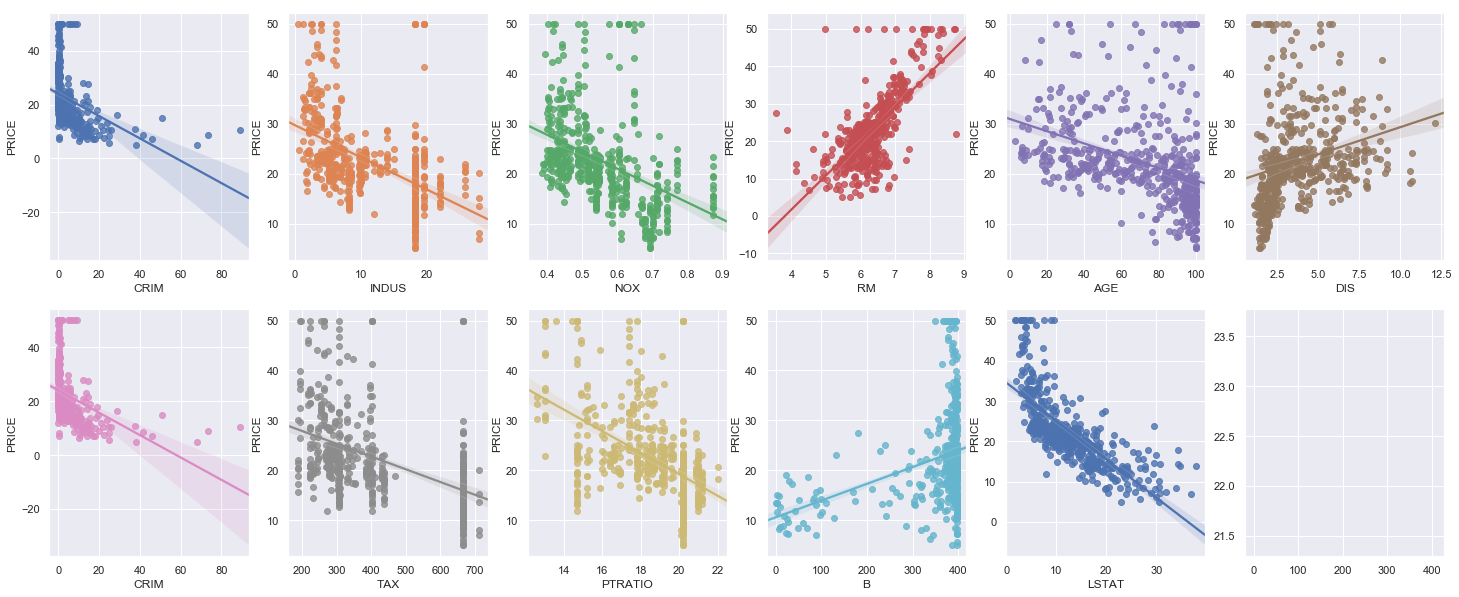

In [4]:
sns.set(color_codes=True)
fig, axs = plt.subplots(nrows=2,ncols=6,figsize=(25,10),squeeze=False)
for i,feat in enumerate(df.columns.drop(['PRICE','CHAS','RAD','ZN','LSTAT','B','PTRATIO','TAX'])):
    sns.regplot(x=feat, y='PRICE', data=df, ax=axs[0][i])
for i,feat in enumerate(df.columns.drop(['PRICE','CHAS','RAD','ZN','RAD','DIS','AGE','RM','NOX','INDUS'])):
    sns.regplot(x=feat, y='PRICE', data=df, ax=axs[1][i])

### Modelization

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('PRICE',axis=1), df.PRICE, test_size=0.3, random_state=10)

In [57]:
reg=DecisionTreeRegressor(criterion='mse', max_depth=3)
reg.fit(X_train,y_train)

r2_score(y_test, reg.predict(X_test))

0.7234698082860911

In [58]:
X = df[['LSTAT']].values                        
y = df['PRICE'].values                          

sort_idx = X.flatten().argsort()
X = X[sort_idx]
y = y[sort_idx]

reg = DecisionTreeRegressor(criterion='mse', max_depth=3)         
reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

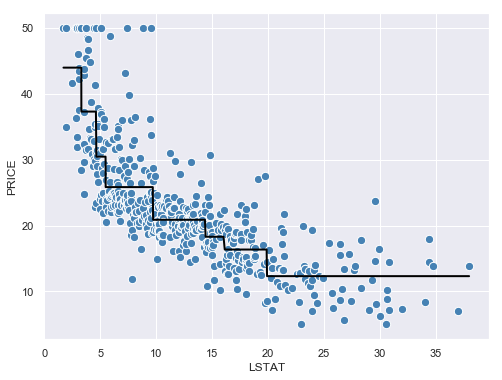

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='steelblue',        
            edgecolor='white', s=70)
plt.plot(X, reg.predict(X),           
         color='black', lw=2)
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()


In [60]:
X = df[['LSTAT']].values                        
y = df['PRICE'].values                          

sort_idx = X.flatten().argsort()
X = X[sort_idx]
y = y[sort_idx]


regressors = []
depths = [1, 3, 5, 8]
Y_test = []
for p in depths:
    model = DecisionTreeRegressor(max_depth=p)  # Création d'un arbre de régression de profondeur p
    model.fit(X, y)  # Processus d'optimisation de l'arbre
    Y_test.append(model.predict(X))  # On prédit sur les données et on ajoute à la liste des valeurs prédites
    regressors.append(model)

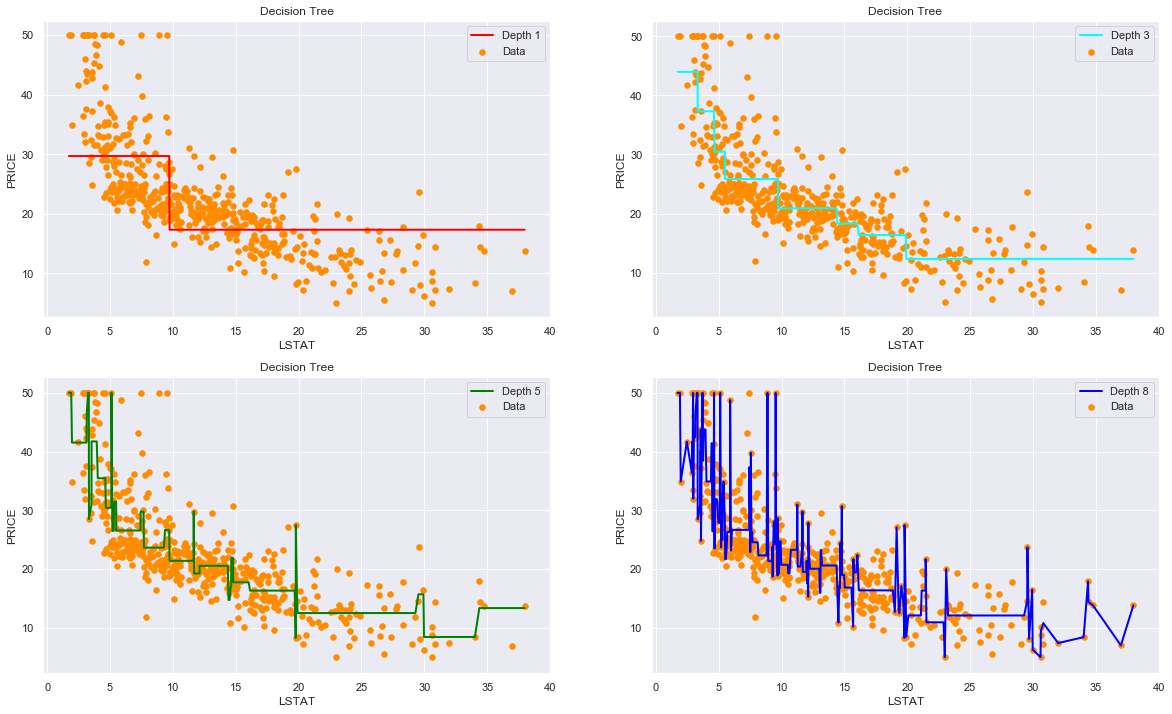

In [61]:
plt.figure(figsize=(20, 12))
colors = [ "red", "cyan", "green", "blue"]

for i, reg in zip(range(len(regressors)), regressors):
    plt.subplot(220 + i + 1)
    plt.plot(X, Y_test[i], color=colors[i], label="Depth {0}".format(depths[i]), linewidth=2)
    plt.scatter(X, y, s=30, c="darkorange", label="Data")
    plt.xlabel("LSTAT")
    plt.ylabel("PRICE")
    plt.title("Decision Tree")
    plt.legend()
    
plt.show()

#### Optimization

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('PRICE',axis=1), df.PRICE, test_size=0.3, random_state=10)

In [188]:
grid_params = {
    'max_depth': np.arange(2,12,1),
    'min_samples_split': np.arange(2,12,1)
}

cv_result = {
    'test_score': [],
    'parameters': []
}

for params in product(*grid_params.values()):
    
    reg = DecisionTreeRegressor(criterion='mse', max_depth=params[0], min_samples_leaf=4,min_samples_split=params[1], splitter='best')
    reg.fit(X_train, y_train)
    test_score = r2_score(y_test, reg.predict(X_test))
    
    cv_result['test_score'].append(test_score)
    cv_result['parameters'].append(params)

In [206]:
def plot_grid_results(cv):
    score_matrix = np.asarray(cv["test_score"]).reshape((10,10))

    plt.figure(figsize=(10, 8))
    plt.title("Scores R2")
    sns.set(font_scale=1.5)
    annotations = np.array([[str("{:2.2f}".format(x * 100))
                              for x in row ] for row in score_matrix])
    ax = sns.heatmap(score_matrix, annot=annotations, fmt="",
               yticklabels=grid_params["max_depth"],
               xticklabels=grid_params["min_samples_split"],annot_kws={"size":12})
    ax.set(ylabel="max_depth", xlabel="min_samples_split")

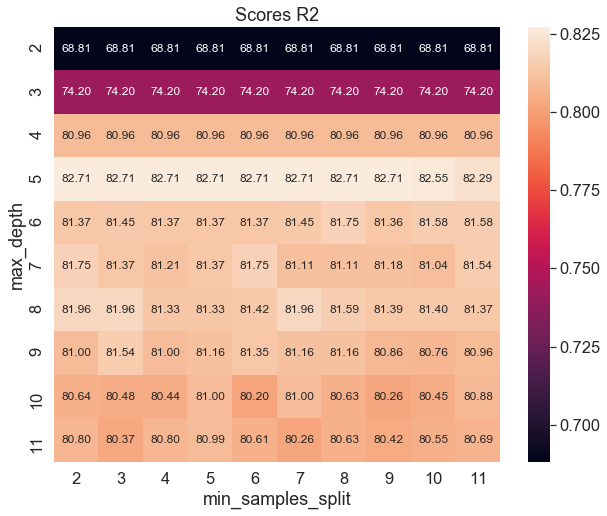

In [207]:
plot_grid_results(cv_result)

#### Stability

In [276]:
def r2(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=None)
    r2=[]
    for train_I, test_I in rkf.split(df):
        X_fold_train = df.iloc[train_I, :].drop('PRICE',axis=1)
        y_fold_train = df['PRICE'].values[train_I]
        X_fold_test = df.iloc[test_I, :].drop('PRICE',axis=1)
        y_fold_test = df['PRICE'].values[test_I]
        reg = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=4,min_samples_split=2, splitter='best')
        reg.fit(X_fold_train, y_fold_train)
        r2.append(r2_score(y_fold_test, reg.predict(X_fold_test)))
    print('The estimation of the r2 score over the test distributions is:', "{:2.2f}".format(np.mean(r2)),'\u00B1', "{:2.2f}".format(np.std(r2)))
    
    return r2

In [272]:
def MSE(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=None)
    MSE=[]
    for train_I, test_I in rkf.split(df):
        X_fold_train = df.iloc[train_I, :].drop('PRICE',axis=1)
        y_fold_train = df['PRICE'].values[train_I]
        X_fold_test = df.iloc[test_I, :].drop('PRICE',axis=1)
        y_fold_test = df['PRICE'].values[test_I]
        reg = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=4,min_samples_split=2, splitter='best')
        reg.fit(X_fold_train, y_fold_train)
        MSE.append(mean_squared_error(y_fold_test, reg.predict(X_fold_test)))
    print('The estimation of the MSE over the test distributions is:', "{:2.2f}".format(np.mean(MSE)),'\u00B1', "{:2.2f}".format(np.std(MSE)))
    
    return MSE

The estimation of the r2 score over the test distributions is: 0.76 ± 0.09


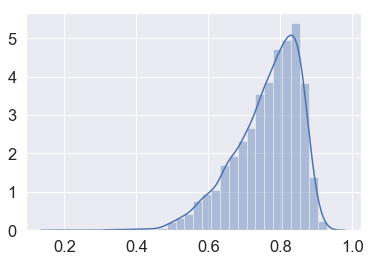

In [277]:
sns.distplot(r2(1000),bins=30)

The estimation of the MSE over the test distributions is: 19.52 ± 7.51


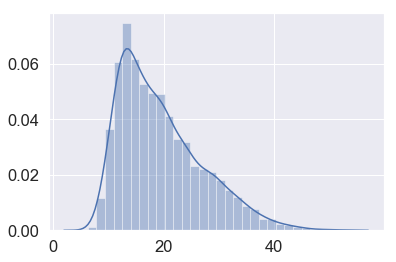

In [239]:
sns.distplot(MSE(1000),bins=30)

#### Intepretability 

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('PRICE',axis=1), df.PRICE, test_size=0.3, random_state=10)

In [261]:
reg = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=4,min_samples_split=2, splitter='best')
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

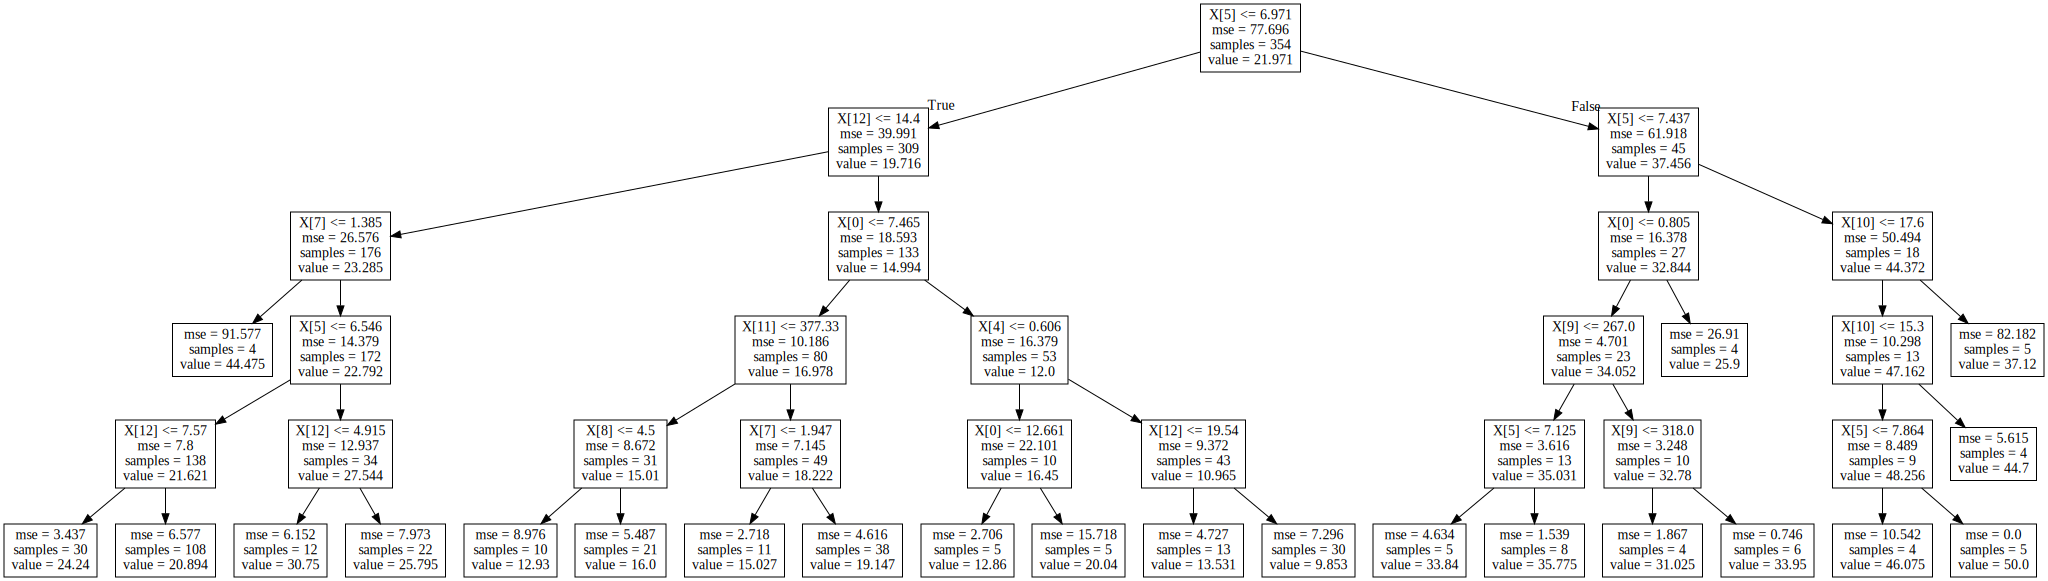

In [290]:
dot_data = tree.export_graphviz(reg, out_file=None) 
graph = graphviz.Source(dot_data)
graph
#graph.render("promos_tree")

In [256]:
features_imp = pd.DataFrame(
    data=np.asarray([df.columns.drop('PRICE'), reg.feature_importances_]).transpose(),
    columns=['Variable', 'Importance'])
features_imp

,Variable,Importance
0,CRIM,0.0422261
1,ZN,0
2,INDUS,0
3,CHAS,0
4,NOX,0.0101413
5,RM,0.612979
6,AGE,0
7,DIS,0.0823802
8,RAD,0.00265277
9,TAX,0.00118972


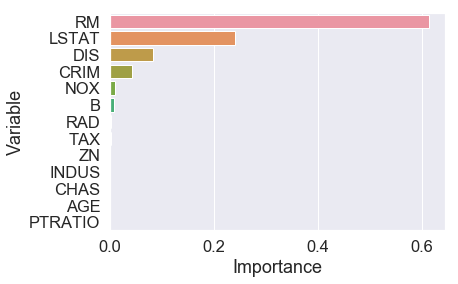

In [257]:
sns.barplot(y='Variable', x='Importance', data=features_imp.sort_values(by='Importance', ascending=False))